In [1]:
import os
import sys
MAIN_PATH = os.path.dirname(os.getcwd())
sys.path.insert(0, MAIN_PATH)

import librosa
import audiomentations
import soundfile as sf
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [2]:
y, sr = librosa.load(os.path.join(MAIN_PATH, 'data/The Four Seasons - Spring - Allegro.wav'), duration=10, sr=8000)

In [3]:
ir_signal, sr = librosa.load(os.path.join(MAIN_PATH, 'data/h133_SubwayStation_ParkStreetBoston_1txts.wav'), sr=8000)

In [4]:
z = signal.convolve(y, ir_signal, mode='same')

In [5]:
max_value = max(np.amax(z), -np.amin(z))
if max_value > 0.0:
    scale = 0.5 / max_value

z *= scale

In [6]:
signals = [y, ir_signal, z]

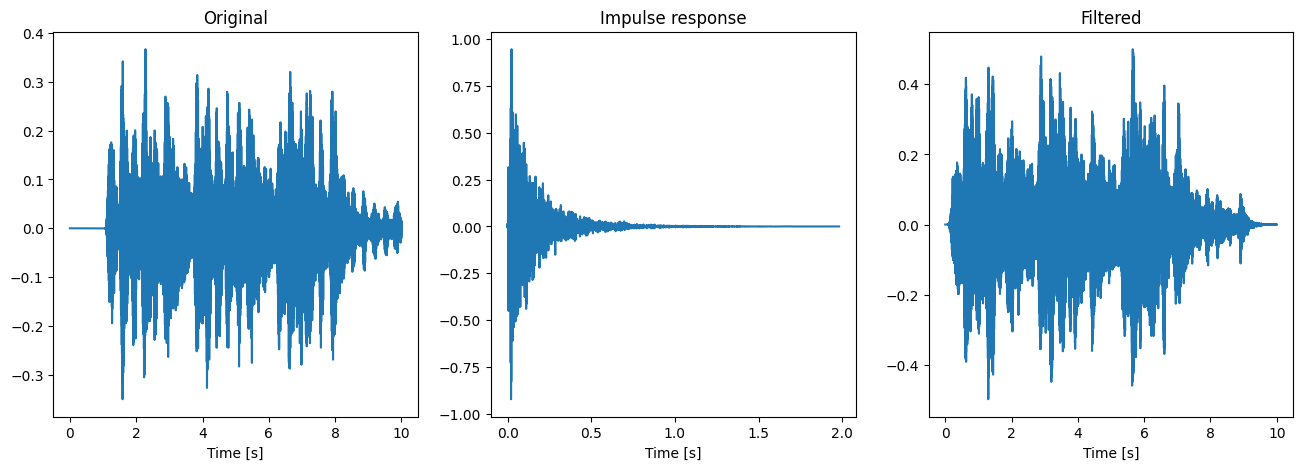

In [7]:
fig, ax = plt.subplots(figsize = (16, 5), ncols = 3)
for i, (s, name) in enumerate(zip(signals, ['Original', 'Impulse response', 'Filtered'])):
    dur = s.size / sr
    t = np.linspace(start=0, stop=dur, num=int(dur * sr))
    ax[i].plot(t, s)
    ax[i].set_title(name)
    ax[i].set_xlabel('Time [s]')
plt.show()